# Hallucination Analysis on Llama 3 8b

This notebook is for analyzing the results for the Hallucination rate on Llama 3 8b.

In [1]:
import os
import sys
import goodfire
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
sys.path.append('../..')
sys.path.append('../medhalt')
from src.medhalt.medhalt.models.utils import PromptDataset
load_dotenv()
GOODFIRE_API_KEY = os.getenv('GOODFIRE_API_KEY')

ModuleNotFoundError: No module named 'src.medhalt'

In [2]:
def get_hallucination_rate(possitive_samples: int, negative_samples: int):
    """
    Basic function for calculating the hallucination rate.
    """
    return len(possitive_samples) / (len(possitive_samples) + len(negative_samples))

## Analyzing the Hallucination Rate on the default variant (feature_weight = 0)

In [3]:
fct_ds = PromptDataset("FCT", lambda x: x)
fct_df = pd.DataFrame([example for example in fct_ds])
df = pd.read_csv("../data/fct_responses_clean.tsv", sep="\t")

NameError: name 'PromptDataset' is not defined

In [6]:
# Plot a bar chart of the number of hallucinated and non-hallucinated responses in the dataset.
hallucination_value_counts = df['hallucinated'].value_counts()
hallucination_rate = get_hallucination_rate(df[df['hallucinated'] == True], df[df['hallucinated'] == False])
print(f"Base hallucination rate: {hallucination_rate * 100:.2f}%")

Base hallucination rate: 26.04%


## Analizing on Features

### Feature 1:
The feature analized is tagged: "The model should not recommend technological or medical interventions"

In [10]:
df_results = pd.read_csv('../data/feature_0_benchmark_results.tsv', sep='\t')
df_results

,feature_activation,hallucination_rate,hallucination_rate_error,accuracy
0,-0.500000,0.573034,0.056739,0.47191
1,-0.357143,0.382979,0.045134,0.48000
2,-0.214286,0.324742,0.040914,0.49000
3,-0.071429,0.360825,0.043127,0.47000
4,0.071429,0.356021,0.043174,0.45000
5,0.214286,0.444444,0.050981,0.42000
6,0.357143,0.482014,0.058887,0.38000
7,0.500000,0.556701,0.075757,0.35000


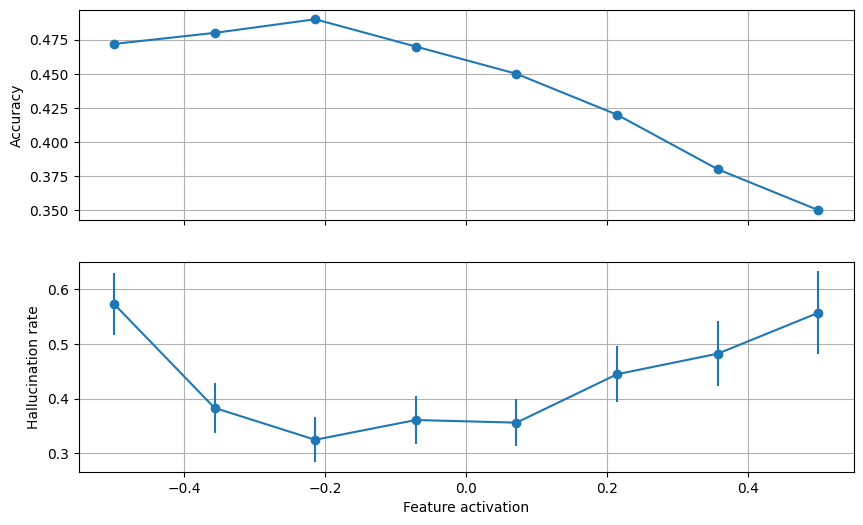

In [11]:
feature_activations = df_results['feature_activation'].values
hallucination_rates = df_results['hallucination_rate'].values
hallucination_rate_errors = df_results['hallucination_rate_error'].values
accuracies = df_results['accuracy'].values

# Plot both accuracy and hallucination rate vs feature activation
fig, axs = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

# Plot the accuracy vs feature activation
axs[0].errorbar(feature_activations, accuracies, fmt='o-')
axs[0].set_ylabel('Accuracy')
axs[0].grid()

# Plot the hallucination rate vs feature activation
axs[1].errorbar(feature_activations, hallucination_rates, yerr=hallucination_rate_errors, fmt='o-')
axs[1].set_xlabel('Feature activation')
axs[1].set_ylabel('Hallucination rate')
axs[1].grid()


### Feature 2:
The feature analized is tagged: "Medical imaging techniques and procedures"

In [13]:
df_results = pd.read_csv('../data/feature_1_benchmark_results.tsv', sep='\t')
df_results

,feature_activation,hallucination_rate,hallucination_rate_error,accuracy
0,-0.500000,0.747368,0.062718,0.430000
1,-0.357143,0.628866,0.056935,0.450000
2,-0.214286,0.497436,0.050507,0.460000
3,-0.071429,0.417526,0.046392,0.460000
4,0.071429,0.272727,0.038189,0.440000
5,0.214286,0.209677,0.033575,0.450000
6,0.357143,0.303030,0.039121,0.364706
7,0.500000,0.395722,0.046002,0.287356


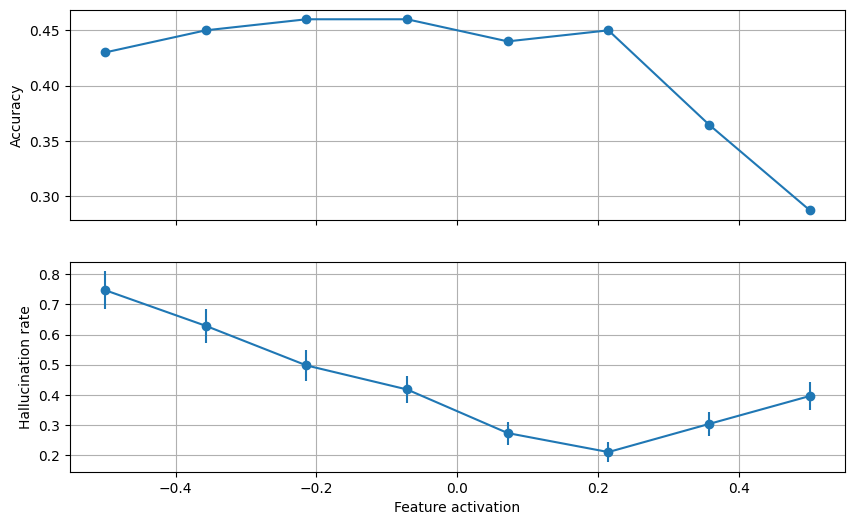

In [14]:
feature_activations = df_results['feature_activation'].values
hallucination_rates = df_results['hallucination_rate'].values
hallucination_rate_errors = df_results['hallucination_rate_error'].values
accuracies = df_results['accuracy'].values

# Plot both accuracy and hallucination rate vs feature activation
fig, axs = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

# Plot the accuracy vs feature activation
axs[0].errorbar(feature_activations, accuracies, fmt='o-')
axs[0].set_ylabel('Accuracy')
axs[0].grid()

# Plot the hallucination rate vs feature activation
axs[1].errorbar(feature_activations, hallucination_rates, yerr=hallucination_rate_errors, fmt='o-')
axs[1].set_xlabel('Feature activation')
axs[1].set_ylabel('Hallucination rate')
axs[1].grid()
